In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
name_list=["Status of account",'Duration','Credit history','Purpose','Credit amount',
           'Savings account','Present employment','Installment rate','Personal status and sex','Other debtors',
           'Present residence','Property','Age','Other installment plans','Housing',
           'Number of existing credits','Job','Number of people','Telephone','Foreign worker',
           'y'
          ]

In [3]:
train=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",delimiter=r"\s+",names=name_list)

In [4]:
train.head(5)

,Status of account,Duration,Credit history,Purpose,Credit amount,Savings account,Present employment,Installment rate,Personal status and sex,Other debtors,...,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people,Telephone,Foreign worker,y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


# displaying data

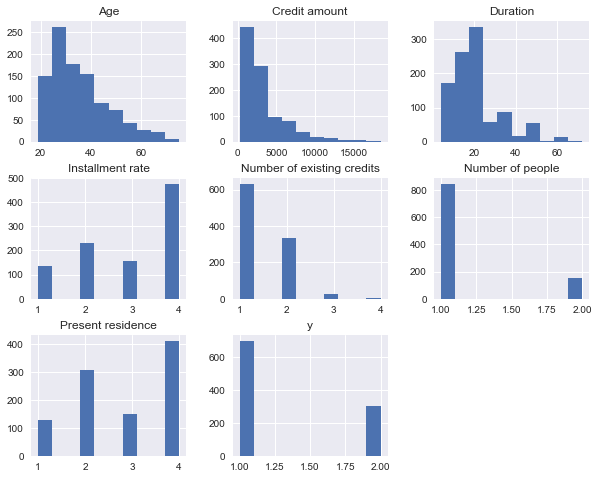

In [5]:
train.hist(figsize=(10,8))
plt.show()

# preprocessing the dataset

In [6]:
#check missing data

In [7]:
train.isnull().sum()

Status of account             0
Duration                      0
Credit history                0
Purpose                       0
Credit amount                 0
Savings account               0
Present employment            0
Installment rate              0
Personal status and sex       0
Other debtors                 0
Present residence             0
Property                      0
Age                           0
Other installment plans       0
Housing                       0
Number of existing credits    0
Job                           0
Number of people              0
Telephone                     0
Foreign worker                0
y                             0
dtype: int64

In [8]:
numerical_features=['Duration','Credit amount','Installment rate',
                    'Present residence','Age','Number of existing credits',
                    'Number of people']


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['Status of account'] = le.fit_transform(train['Status of account'].values)
train['Credit history'] = le.fit_transform(train['Credit history'].values)
train['Purpose'] = le.fit_transform(train['Credit history'].values)
train['Savings account'] = le.fit_transform(train['Savings account'].values)
train['Present employment'] = le.fit_transform(train['Present employment'].values)
train['Property'] = le.fit_transform(train['Property'].values)
train['Other debtors'] = le.fit_transform(train['Other debtors'].values)
train['Other installment plans'] = le.fit_transform(train['Other installment plans'].values)
train['Housing'] = le.fit_transform(train['Housing'].values)
train['Telephone'] = le.fit_transform(train['Telephone'].values)

Foreign_worker_mapping = {
           'A201': 1,
           'A202': 0,
           }

train['Foreign worker'] = train['Foreign worker'].apply(lambda x: Foreign_worker_mapping[x])








In [10]:
form_mapping = {
           'A171': [0,0,0],
           'A172': [1,0,0],
           'A173': [1,1,0],
            'A174':[1,1,1]
}
train['Job'] = train['Job'].apply(lambda x: form_mapping[x])

In [11]:
Job= pd.DataFrame(train.Job.tolist(),columns=['Job_1','Job_2','Job_3'] )
train = train.drop('Job',axis=1)
train=pd.concat([train,Job ], axis=1)

In [12]:
sex_mapping = {
           'A91':'male',
           'A93': 'male',
           'A94': 'female',
            'A92':'female',
            'A95':'female'
}
train['Sex'] = train['Personal status and sex'].apply(lambda x: sex_mapping[x])


Personal_status_mapping = {
           'A91':'divorced/separated/married',
           'A92': 'divorced/separated/married',
           'A93': 'single',
            'A94':'divorced/separated/married',
            'A95':'single'
}
train['Personal status'] = train['Personal status and sex'].apply(lambda x: Personal_status_mapping[x])


train=train.drop('Personal status and sex',axis=1)



In [13]:
dummies_Sex=pd.get_dummies(train['Sex'],prefix='Sex')
dummies_status = pd.get_dummies(train['Personal status'], prefix= 'Embarked') 
train = pd.concat([train, dummies_Sex, dummies_status], axis=1)
train = train.drop(['Sex','Personal status'], axis=1)

train.head()

,Status of account,Duration,Credit history,Purpose,Credit amount,Savings account,Present employment,Installment rate,Other debtors,Present residence,...,Telephone,Foreign worker,y,Job_1,Job_2,Job_3,Sex_female,Sex_male,Embarked_divorced/separated/married,Embarked_single
0,0,6,4,4,1169,4,4,4,0,4,...,1,1,1,1,1,0,0,1,0,1
1,1,48,2,2,5951,0,2,2,0,2,...,0,1,2,1,1,0,1,0,1,0
2,3,12,4,4,2096,0,3,2,0,3,...,0,1,1,1,0,0,0,1,0,1
3,0,42,2,2,7882,0,3,2,2,4,...,0,1,1,1,1,0,0,1,0,1
4,0,24,3,3,4870,0,2,3,0,4,...,0,1,2,1,1,0,0,1,0,1


In [14]:
for i in numerical_features: 
    scaler = preprocessing.StandardScaler()
    train[i] = scaler.fit_transform(train[i])

/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/bruce/anaconda

In [15]:
train.head()

,Status of account,Duration,Credit history,Purpose,Credit amount,Savings account,Present employment,Installment rate,Other debtors,Present residence,...,Telephone,Foreign worker,y,Job_1,Job_2,Job_3,Sex_female,Sex_male,Embarked_divorced/separated/married,Embarked_single
0,0,-1.236478,4,4,-0.745131,4,4,0.918477,0,1.046987,...,1,1,1,1,1,0,0,1,0,1
1,1,2.248194,2,2,0.949817,0,2,-0.870183,0,-0.765977,...,0,1,2,1,1,0,1,0,1,0
2,3,-0.738668,4,4,-0.416562,0,3,-0.870183,0,0.140505,...,0,1,1,1,0,0,0,1,0,1
3,0,1.750384,2,2,1.634247,0,3,-0.870183,2,1.046987,...,0,1,1,1,1,0,0,1,0,1
4,0,0.256953,3,3,0.566664,0,2,0.024147,0,1.046987,...,0,1,2,1,1,0,0,1,0,1


In [16]:
features=train.drop("y",axis=1)
outcomes=train["y"].values
features.head(5)

,Status of account,Duration,Credit history,Purpose,Credit amount,Savings account,Present employment,Installment rate,Other debtors,Present residence,...,Number of people,Telephone,Foreign worker,Job_1,Job_2,Job_3,Sex_female,Sex_male,Embarked_divorced/separated/married,Embarked_single
0,0,-1.236478,4,4,-0.745131,4,4,0.918477,0,1.046987,...,-0.428290,1,1,1,1,0,0,1,0,1
1,1,2.248194,2,2,0.949817,0,2,-0.870183,0,-0.765977,...,-0.428290,0,1,1,1,0,1,0,1,0
2,3,-0.738668,4,4,-0.416562,0,3,-0.870183,0,0.140505,...,2.334869,0,1,1,0,0,0,1,0,1
3,0,1.750384,2,2,1.634247,0,3,-0.870183,2,1.046987,...,2.334869,0,1,1,1,0,0,1,0,1
4,0,0.256953,3,3,0.566664,0,2,0.024147,0,1.046987,...,2.334869,0,1,1,1,0,0,1,0,1


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, outcomes, test_size=0.25, random_state=10)

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Random forest by sklearn

In [19]:
model=RandomForestClassifier(n_estimators=5)
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
results=["Ranom Forest",cv_result.mean(),cv_result.std()]

print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[0] , results[1] * 100, results[2] * 100))

Ranom Forest         70.67 (+/-) 3.77 


In [20]:
final_model = RandomForestClassifier(n_estimators=100,max_features='auto',bootstrap=True,oob_score=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[166   4]
 [ 59  21]]
74.8
             precision    recall  f1-score   support

          1       0.74      0.98      0.84       170
          2       0.84      0.26      0.40        80

avg / total       0.77      0.75      0.70       250



In [22]:
final_model = RandomForestClassifier(n_estimators=100,max_features=None,bootstrap=True,oob_score=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[151  19]
 [ 39  41]]
76.8
             precision    recall  f1-score   support

          1       0.79      0.89      0.84       170
          2       0.68      0.51      0.59        80

avg / total       0.76      0.77      0.76       250



In [21]:
final_model = RandomForestClassifier(n_estimators=1,max_features=None,bootstrap=False,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[141  29]
 [ 40  40]]
72.4
             precision    recall  f1-score   support

          1       0.78      0.83      0.80       170
          2       0.58      0.50      0.54        80

avg / total       0.72      0.72      0.72       250



# Random forest by xgboost

In [19]:
from xgboost import XGBClassifier


final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=3,subsample=0.632,colsample_bytree=0.3)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)


from sklearn.metrics import roc_curve, auc
false_positive_rate1, true_positive_rate1, thresholds = roc_curve(Y_test, y_pred)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
print(roc_auc1)



[[158  12]
 [ 43  37]]
78.0
             precision    recall  f1-score   support

          1       0.79      0.93      0.85       170
          2       0.76      0.46      0.57        80

avg / total       0.78      0.78      0.76       250



ValueError: Data is not binary and pos_label is not specified

# decision tree by xgboost

In [40]:
from xgboost import XGBClassifier


final_model = XGBClassifier(n_estimators=1,num_boost_round=1,max_depth=3,subsample=1,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[149  21]
 [ 43  37]]
74.4
             precision    recall  f1-score   support

          1       0.78      0.88      0.82       170
          2       0.64      0.46      0.54        80

avg / total       0.73      0.74      0.73       250



# bagged decision trees

In [37]:
from xgboost import XGBClassifier


final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=3,subsample=0.632,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[152  18]
 [ 40  40]]
76.8
             precision    recall  f1-score   support

          1       0.79      0.89      0.84       170
          2       0.69      0.50      0.58        80

avg / total       0.76      0.77      0.76       250



In [364]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.layers import Dense, Activation, Dropout
from keras import optimizers

history = History()

In [368]:
m = Sequential()
m.add(Dense(640, activation='sigmoid', input_shape=(X_train.shape[1],)))
m.add(Dropout(0.5))
m.add(Dense(640, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(640, activation='sigmoid'))
# m.add(Dropout(0.5))
m.add(Dense(len(np.unique(Y_train)), activation='softmax'))
    
m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['binary_accuracy']
)

In [369]:
weights = m.layers[0].get_weights()
weights

[array([[ 0.01561418, -0.02596954, -0.03478066, ..., -0.02423057,
         -0.00749107, -0.04753182],
        [ 0.08588466,  0.00110547,  0.03656653, ...,  0.06312191,
          0.08274621,  0.04087494],
        [ 0.08248322,  0.05960596,  0.07256536, ...,  0.0632799 ,
          0.06784885,  0.00446068],
        ..., 
        [-0.03295828,  0.01184713, -0.07009637, ...,  0.001541  ,
         -0.03002427, -0.06424326],
        [ 0.09183723,  0.01363882,  0.07385056, ..., -0.02947772,
         -0.04475392,  0.07793397],
        [ 0.08721979,  0.0255806 ,  0.02710284, ...,  0.02433027,
         -0.08511245,  0.07555759]], dtype=float32),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [370]:
hist=m.fit(
    # Feature matrix
    X_train.values, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=400, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.2,
    batch_size=256, 
)

Train on 600 samples, validate on 150 samples
Epoch 1/400
Epoch 00000: val_loss improved from inf to 0.81231, saving model to best.model
0s - loss: 0.8874 - binary_accuracy: 0.7150 - val_loss: 0.8123 - val_binary_accuracy: 0.3200
Epoch 2/400
Epoch 00001: val_loss did not improve
0s - loss: 0.7243 - binary_accuracy: 0.4700 - val_loss: 0.8190 - val_binary_accuracy: 0.6800
Epoch 3/400
Epoch 00002: val_loss improved from 0.81231 to 0.64157, saving model to best.model
0s - loss: 0.7298 - binary_accuracy: 0.7133 - val_loss: 0.6416 - val_binary_accuracy: 0.6800
Epoch 4/400
Epoch 00003: val_loss did not improve
0s - loss: 0.6017 - binary_accuracy: 0.7117 - val_loss: 0.6467 - val_binary_accuracy: 0.6800
Epoch 5/400
Epoch 00004: val_loss did not improve
0s - loss: 0.6305 - binary_accuracy: 0.6950 - val_loss: 0.6550 - val_binary_accuracy: 0.6800
Epoch 6/400
Epoch 00005: val_loss improved from 0.64157 to 0.63007, saving model to best.model
0s - loss: 0.6135 - binary_accuracy: 0.7133 - val_loss: 0.

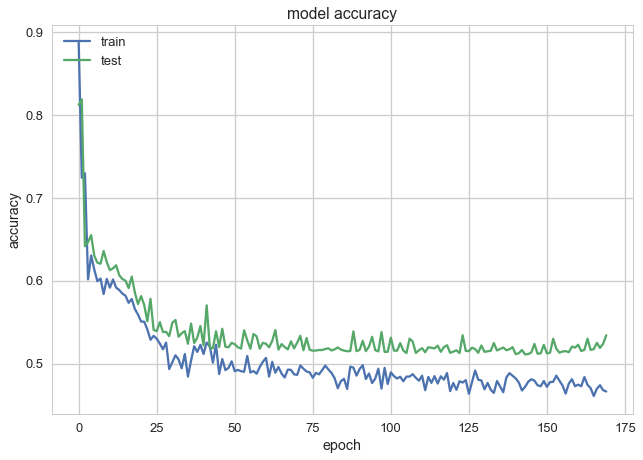

In [371]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [372]:
m.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in m.predict(X_test.values).argmax(axis=1)]

In [373]:
from keras.utils import plot_model
plot_model(m, to_file='model.png')

In [374]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[151  19]
 [ 40  40]]
76.4
             precision    recall  f1-score   support

          1       0.79      0.89      0.84       170
          2       0.68      0.50      0.58        80

avg / total       0.75      0.76      0.75       250



In [329]:
Y_test

array([1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

# neural network ensemble

In [67]:
data_train,data_test=train_test_split(train,test_size=0.25, random_state=10)
X_test=data_test.drop(['y'], axis=1).values
Y_test=data_test['y'].ravel()


def train_nn(data_train):
    data_train_new=data_train.sample(frac=0.8,replace=True)
    X_train=data_train_new.drop(['y'], axis=1).values
    Y_train=data_train_new['y'].ravel()
    
    m = Sequential()
    m.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation='relu'))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation='relu'))
    m.add(Dropout(0.5))
    m.add(Dense(len(np.unique(Y_train)), activation='softmax'))
    
    m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )
    
    m.fit(
    # Feature matrix
    X_train, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=256, 
    )
    m.load_weights("best.model")
    mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
    )
    y_pred = [mapping[pred] for pred in m.predict(X_test).argmax(axis=1)]
    return y_pred 
    

In [68]:
result=[]
for i in range(50):
    y_pred=train_nn(data_train)
    result.append(y_pred)

Train on 540 samples, validate on 60 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.57525, saving model to best.model
0s - loss: 0.7549 - acc: 0.6074 - val_loss: 0.5753 - val_acc: 0.7500
Epoch 2/200
Epoch 00001: val_loss improved from 0.57525 to 0.56478, saving model to best.model
0s - loss: 0.7053 - acc: 0.6593 - val_loss: 0.5648 - val_acc: 0.7500
Epoch 3/200
Epoch 00002: val_loss improved from 0.56478 to 0.55667, saving model to best.model
0s - loss: 0.6723 - acc: 0.6870 - val_loss: 0.5567 - val_acc: 0.7500
Epoch 4/200
Epoch 00003: val_loss improved from 0.55667 to 0.54973, saving model to best.model
0s - loss: 0.6249 - acc: 0.6741 - val_loss: 0.5497 - val_acc: 0.7500
Epoch 5/200
Epoch 00004: val_loss improved from 0.54973 to 0.54591, saving model to best.model
0s - loss: 0.6281 - acc: 0.6759 - val_loss: 0.5459 - val_acc: 0.7500
Epoch 6/200
Epoch 00005: val_loss improved from 0.54591 to 0.54190, saving model to best.model
0s - loss: 0.6204 - acc: 0.6963 - val_loss: 

In [69]:
result_new=np.array(result)
result_new

array([[1, 1, 1, ..., 1, 1, 2],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 2],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 2, 1, 2],
       [1, 1, 1, ..., 1, 1, 1]])

In [70]:
re=result_new.sum(axis=0)
re

array([52, 50, 50, 50, 50, 53, 50, 51, 94, 78, 54, 54, 93, 76, 86, 68, 50,
       95, 50, 93, 54, 52, 50, 80, 52, 50, 50, 74, 51, 50, 90, 57, 66, 82,
       51, 50, 95, 50, 50, 50, 50, 75, 85, 50, 50, 72, 50, 50, 52, 90, 52,
       51, 50, 55, 61, 93, 89, 50, 54, 50, 80, 50, 90, 68, 55, 51, 78, 57,
       91, 50, 62, 93, 67, 50, 50, 51, 51, 50, 50, 55, 50, 50, 54, 53, 50,
       50, 50, 70, 50, 81, 52, 62, 50, 62, 50, 79, 85, 50, 52, 95, 81, 61,
       53, 50, 50, 50, 75, 50, 50, 70, 50, 50, 71, 56, 91, 50, 93, 50, 61,
       73, 50, 50, 50, 51, 53, 50, 50, 83, 57, 50, 50, 53, 82, 53, 75, 52,
       76, 50, 50, 50, 55, 50, 81, 50, 50, 50, 81, 50, 52, 50, 85, 50, 60,
       62, 91, 50, 93, 51, 51, 50, 91, 53, 63, 50, 50, 78, 57, 51, 53, 64,
       50, 50, 50, 57, 59, 59, 94, 85, 68, 50, 64, 94, 89, 50, 90, 52, 77,
       70, 62, 50, 50, 50, 92, 53, 73, 93, 74, 51, 50, 50, 70, 69, 63, 53,
       50, 53, 70, 50, 50, 65, 50, 67, 50, 53, 50, 95, 63, 51, 87, 64, 50,
       51, 50, 50, 62, 57

In [161]:
y_pred=[]
for each in re:
    if each>=68:
        y_pred.append(2)
    else:
        y_pred.append(1)

In [162]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[148  22]
 [ 32  48]]
78.4
             precision    recall  f1-score   support

          1       0.82      0.87      0.85       170
          2       0.69      0.60      0.64        80

avg / total       0.78      0.78      0.78       250



In [276]:
from sklearn.tree import export_graphviz
import os
export_graphviz(final_model.estimators_[0],
                feature_names=X_train.columns,
                filled=True,
                rounded=True)

/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/tree/export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


In [277]:
os.system('dot -Tpng tree.dot -o tree.png')

0